In [1]:
import pandas as pd

#### Importation des données

In [2]:
df = pd.read_csv(
    "Data/raw/bso-publications-latest_180036048_enriched.csv",
    sep=";",
    usecols=[
        "doi",
        "year",
        "is_oa",
        "oa_host_type",
        "journal_is_in_doaj",
        "journal_is_oa",
        "unpaywall_oa_status",
        "licence_publisher",
    ],
)
df

,doi,year,is_oa,oa_host_type,journal_is_in_doaj,journal_is_oa,unpaywall_oa_status,licence_publisher
0,10.1016/s0959-8049(16)32649-1,2016,False,closed,False,False,NaN,NaN
1,10.1016/j.jval.2016.09.172,2016,True,publisher,False,False,hybrid,other
2,10.1093/annonc/mdw392.33,2016,True,publisher,False,False,hybrid,other
3,10.3109/09687637.2016.1153603,2016,False,closed,False,False,NaN,NaN
4,10.1016/s0924-977x(16)31406-7,2016,False,closed,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...
135121,10.3390/cancers13143518,2021,True,publisher-repository,True,True,gold,cc-by
135122,10.1186/s13072-021-00410-x,2021,True,publisher-repository,True,True,gold,cc-by
135123,10.1371/journal.ppat.1009427,2021,True,publisher-repository,True,True,gold,cc-by
135124,10.1016/j.cmi.2020.03.020,2020,True,publisher-repository,False,False,hybrid,other


#### Restriction à l'année à traiter

***<span style="color:red">Dans la variable "annee" mettre la dernière année à traiter, par exemple pour le fichier enrichie recu fin 2023, on se limite aux publications de 2022</span>***

In [3]:
annee = 2022

In [4]:
df_year = df.loc[df['year'] == annee, :]
df_year

,doi,year,is_oa,oa_host_type,journal_is_in_doaj,journal_is_oa,unpaywall_oa_status,licence_publisher
232,10.3917/spub.215.0627,2022,True,publisher,False,False,bronze,no license
251,10.21037/hbsn-21-512,2022,True,publisher-repository,False,True,gold,cc-by-nc-nd
270,10.1016/j.pneurobio.2021.102177,2022,False,closed,False,False,NaN,NaN
291,10.1016/j.yjmcc.2022.08.063,2022,False,closed,False,False,NaN,NaN
292,10.1016/j.yjmcc.2022.08.189,2022,False,closed,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...
132975,10.1016/j.euf.2021.04.006,2022,True,repository,False,False,green,NaN
133379,10.1109/tgrs.2021.3076011,2022,True,repository,False,False,green,NaN
133444,10.1038/s41409-022-01686-7,2022,True,repository,False,False,green,NaN
133849,10.1016/j.survophthal.2021.05.012,2022,True,repository,False,False,green,NaN


#### Nombre total de publications

In [5]:
num_publications = len(df_year)
num_publications

20735

#### OA/Closed

In [6]:
oa = df_year.loc[:, "is_oa"]
num_oa = oa.sum()
closed = ~df_year.loc[:, "is_oa"]
num_closed = closed.sum()

assert(len(df_year) == num_oa + num_closed)
# Le MESR supprime la valeur "closed" dans le champ "unpaywall_oa_status", on se retrouve donc avec "NaN" à la place
# Ne me demandez pas pourquoi ¯\_(ツ)_/¯
assert(df_year.loc[:, "unpaywall_oa_status"].isnull().sum() == num_closed)
assert((df_year.loc[:, "oa_host_type"] == "closed").sum() == num_closed)

#### Green/Publisher 

In [7]:
green = (df_year.loc[:, "oa_host_type"] == "repository")
num_green = green.sum()
publisher = df_year.loc[:, "oa_host_type"].isin(["publisher-repository", "publisher"])
num_publisher = publisher.sum()

assert (num_oa == num_green + num_publisher)
assert (df_year[green & closed].empty)
assert (df_year[publisher & closed].empty)

In [8]:
# ???
# Green implique que l'on est uniquement en repository normalement
# unpaywall_oa_status = green -> oa_host_type = repository
df_year[((df_year.loc[:, "oa_host_type"] == "publisher-repository") & (df_year.loc[:, "unpaywall_oa_status"] == "green"))]

,doi,year,is_oa,oa_host_type,journal_is_in_doaj,journal_is_oa,unpaywall_oa_status,licence_publisher
8035,10.1101/2022.05.02.490314,2022,True,publisher-repository,False,False,green,cc-by
8074,10.1101/2022.03.23.485509,2022,True,publisher-repository,False,False,green,no license
16984,10.1101/2022.08.10.22278636,2022,True,publisher-repository,False,False,green,cc-by
17051,10.1101/2022.07.21.500634,2022,True,publisher-repository,False,False,green,cc-by
17378,10.26434/chemrxiv-2021-l6399-v2,2022,True,publisher-repository,False,False,green,cc-by
18492,10.1101/2022.02.04.478659,2022,True,publisher-repository,False,False,green,cc-by-nc-nd
20093,10.1101/2022.01.24.477452,2022,True,publisher-repository,False,False,green,cc-by
20183,10.21203/rs.3.rs-1225906/v1,2022,True,publisher-repository,False,False,green,cc-by
21803,10.21203/rs.3.rs-1380222/v1,2022,True,publisher-repository,False,False,green,cc-by
22378,10.1101/2022.05.10.491295,2022,True,publisher-repository,False,False,green,cc-by


#### Gold/Journal_not_doaj 

In [9]:
gold = publisher & df_year.loc[:, "journal_is_in_doaj"]
num_gold = gold.sum()
journal_not_doaj = publisher & ~gold
num_journal_not_doaj = journal_not_doaj.sum()

assert(num_publisher == num_gold + num_journal_not_doaj)

In [10]:
df_year.loc[:, "journal_is_in_doaj"].value_counts()

journal_is_in_doaj
False    12752
True      7983
Name: count, dtype: int64

In [11]:
# journal_is_in_doaj mais oa_host_type == repository ? Devrait etre publisher
df_year[(df_year.loc[:, "journal_is_in_doaj"] & ~gold)]

,doi,year,is_oa,oa_host_type,journal_is_in_doaj,journal_is_oa,unpaywall_oa_status,licence_publisher
398,10.1016/j.omtm.2022.07.005,2022,True,repository,True,True,green,NaN
1539,10.1016/j.bjao.2022.100024,2022,True,repository,True,True,green,NaN
1618,10.1002/ctm2.1131,2022,True,repository,True,True,green,NaN
1668,10.1016/j.jdcr.2022.10.025,2022,True,repository,True,True,green,NaN
1686,10.1016/j.ebiom.2022.104367,2022,True,repository,True,True,green,NaN
...,...,...,...,...,...,...,...,...
33833,10.1002/ece3.8605,2022,True,repository,True,True,green,NaN
33884,10.1093/molbev/msac022,2022,True,repository,True,True,green,NaN
33892,10.1002/jcsm.12945,2022,True,repository,True,True,green,NaN
59065,10.15252/emmm.202115622,2022,True,repository,True,True,green,NaN


In [12]:
num_journal_not_doaj

6194

In [13]:
df_year.loc[:, "licence_publisher"].isnull().sum()

6919

#### Bronze/Hybrid

In [14]:
bronze = (journal_not_doaj & (df_year.loc[:, "licence_publisher"] == "no license"))
num_bronze = bronze.sum()
hybrid = journal_not_doaj & ~bronze
num_hybrid = hybrid.sum()

assert(num_journal_not_doaj == num_bronze + num_hybrid)

In [15]:
assert(num_publisher == num_gold + num_bronze + num_hybrid)

In [16]:
# bronze = (df_year.loc[:, "unpaywall_oa_status"] == "bronze")
# num_bronze = bronze.sum()
# hybrid = (df_year.loc[:, "unpaywall_oa_status"] == "hybrid")
# num_hybrid =  hybrid.sum()

## Generation du graphique avec Plotly

#### Installation de Plotly:

Plusieurs possibilités:
* passer par l'interface grahique **Anaconda**.
* En utilisant **Conda**:

Lancer un terminal, vérifier que l'on est bien dans le même environnement que celui qui exécute le notebook Jupyter et taper:
> conda install -c plotly

* En utilisant **pip**:

Lancer un terminal, vérifier que l'on est bien dans le même environnement que celui qui exécute le notebook Jupyter et taper:
>`pip install plotly`

In [17]:
import plotly.graph_objects as go
import plotly.express as px

# For color conversions
from matplotlib import colors as plt_colors

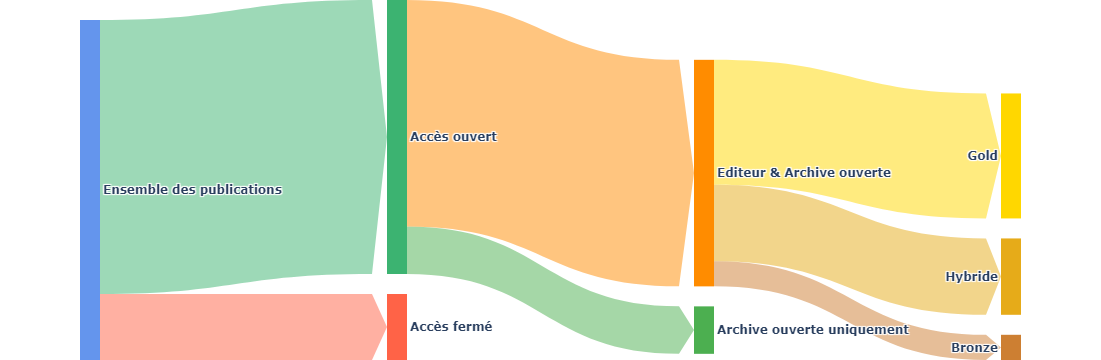

In [30]:
labels = ["Ensemble des publications", "Accès fermé", "Accès ouvert", "Archive ouverte uniquement", "Editeur & Archive ouverte", "Gold", "Hybride", "Bronze"]
colors = ["cornflowerblue", "tomato", "mediumseagreen", "#4CAF50", "darkorange", "gold", "#E6AB19", "#CD7F32"]
sources = [0, 0, 2, 2, 4, 4, 4]
targets = [1, 2, 3, 4, 5, 6, 7]
values = [num_publications, num_closed, num_oa, num_green, num_publisher, num_gold, num_hybrid, num_bronze]
# percentages = [f"{(values[t]/values[s]):.2%}" for s, t in zip(sources, targets)]
percentages = [f"{(values[t]/num_publications):.2%}" for t in targets]

# Add transparency to the list of colors, to display links with partial opacity
transparency = 0.5
colors_transparency = [
    f'rgba({rgba_color[0] * 255:.0f}, {rgba_color[1] * 255:.0f}, {rgba_color[2] * 255:.0f}, {rgba_color[3]})'
    for color in colors
    if (rgba_color := plt_colors.to_rgba(color, transparency))
]

fig = go.Figure(data = [go.Sankey(
    valuesuffix = " publications",
    # valueformat = "d",

    # Nodes
    node=dict(
        label = [f"<b>{label}</b>" for label in labels],
        color = colors,
        line = dict(color = "black", width = 0.),
        align = "left",
        hovertemplate='%{label}:',
        # hoverlabel = dict(bgcolor = "#FFFFFF"), # white background
    ),

    # Links
    link=dict(
        arrowlen=15,
        source = sources,
        target = targets,
        value = values[1:],
        customdata = percentages,
        label = labels[1:],
        color = colors_transparency[1:],
        hovercolor = colors[1:],
        hovertemplate = "%{label}<br />%{value}<extra>%{customdata}</extra>",
        hoverlabel = dict(bgcolor ='#444'),
    )
)])

# Title
fig.update_layout(
    # title_text=f"<b>Proportion des publications {annee} en accès ouvert</b><br><sup>(mesuré en décembre {annee+1})</sup>",
    font_size=12,
    title_x = 0.5,
    # title_y = 0.85,
    # height = 350,
    margin=dict(t=0, b=0),
)

# Display
fig.show()

### Export vers WordPress:

In [19]:
plotly_html = fig.to_html(
    include_plotlyjs = 'cdn', 
    full_html = False,
    # default_width = ,
    default_height = 350,
)

Lors de l'export en HTML, Plotly rajoute des espaces et sauts de lignes inutiles dans le code.  
Pour chacun de ces espaces, WP génére une balise `<p></p>` ce qui casse la mise en page.

Supprime les espaces en trop dans le code html généré :

In [20]:
# Why ?
plotly_html = plotly_html.replace("  ", "")
plotly_html = plotly_html.replace("\n", "")

Rajout du titre en HTML :

In [21]:
title_html = f"<h3><strong>Proportion des publications en accès ouvert en {annee} (mesuré en décembre {annee+1})</strong></h3>"
title_html

'<h3><strong>Proportion des publications en accès ouvert en 2022 (mesuré en décembre 2023)</strong></h3>'

Rajout de la conclusion en HTML sous le graphique :

In [22]:
comment_html = f'<p style="text-align: center;"><strong>{percentages[1]} des publications Inserm sont en accès ouvert</strong></p>&nbsp;'
comment_html

'<p style="text-align: center;"><strong>80.59% des publications Inserm sont en accès ouvert</strong></p>&nbsp;'

In [23]:
full_html = title_html + "\n" + plotly_html + "\n" + comment_html

Sauvegarde dans une fichier :

Ouvrir avec Notepad++ et faire un copier-coller dans WP :

In [24]:
with open("Data/outputs/flow_chart_plotly.html", 'w') as f:
    f.write(full_html)

## Generation du graphique avec Highcharts

#### Installation de Highcharts-core:

Plusieurs possibilités:
* passer par l'interface grahique **Anaconda**.
* En utilisant **Conda**:

Lancer un terminal, vérifier que l'on est bien dans le même environnement que celui qui exécute le notebook Jupyter et taper:
> conda install -c highcharts-core

* En utilisant **pip**:

Lancer un terminal, vérifier que l'on est bien dans le même environnement que celui qui exécute le notebook Jupyter et taper:
>`pip install highcharts-core`

In [25]:
from highcharts_core.chart import Chart
from highcharts_core.options import HighchartsOptions
from highcharts_core.options.series.sankey import SankeySeries

In [26]:
nodes = [
    {
        'id': str(id),
        'name': label,
        'weight': int(weight),
        'color': plt_colors.to_hex(color),
    } for id, label, weight, color in zip(range(8), labels, values, colors)
]

data = [
    {
    'from': str(source),
    'to': str(target),
    'weight': int(weight),
    'color' : plt_colors.to_hex(color),
    } for source, target, weight, color in zip(sources, targets , values[1:], colors[1:])
]


# Set chart options
options = {
    'chart': {
        'inverted': False,
    },
    'title': {
        'text': f"Proportion des publications {annee} en accès ouvert",
    },
    'subtitle': {
        'text': f"(mesuré en décembre {annee+1})",
    },
    'tooltip': {
        'headerFormat': 'null',
        # Not working 
        'nodeFormat': '{point.name}: {point.sum} publications',
        'valueSuffix': ' publications'
    },
    'series': [{
        'nodes': nodes,
        'data': data,
        'type': 'sankey',
        'name': 'Sankey demo series',
    }],
}

my_chart = Chart(options = options)
my_chart.display()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Le tooltip lors du survol d'un node n'est pas gérer correctement pour l'instant par Highcharts for Python**  
Voir [Issue #148](https://github.com/highcharts-for-python/highcharts-core/issues/148)

### Export:

In [29]:
print(my_chart.to_js_literal())

document.addEventListener('DOMContentLoaded', function() {
Highcharts.chart(null,
{
  chart: {
  inverted: false
},
  series: [{
  data: [{
  weight: 4025,
  from: '0',
  to: '1',
  color: '#ff6347'
},
{
  weight: 16710,
  from: '0',
  to: '2',
  color: '#3cb371'
},
{
  weight: 2894,
  from: '2',
  to: '3',
  color: '#4caf50'
},
{
  weight: 13816,
  from: '2',
  to: '4',
  color: '#ff8c00'
},
{
  weight: 7622,
  from: '4',
  to: '5',
  color: '#ffd700'
},
{
  weight: 4657,
  from: '4',
  to: '6',
  color: '#e6ab19'
},
{
  weight: 1537,
  from: '4',
  to: '7',
  color: '#cd7f32'
}],
  name: 'Sankey demo series',
  type: 'sankey',
  nodes: [{
  color: '#6495ed',
  id: '0',
  name: 'Ensemble des publications'
},
{
  color: '#ff6347',
  id: '1',
  name: 'Accès fermé'
},
{
  color: '#3cb371',
  id: '2',
  name: 'Accès ouvert'
},
{
  color: '#4caf50',
  id: '3',
  name: 'Archive ouverte uniquement'
},
{
  color: '#ff8c00',
  id: '4',
  name: 'Editeur & Archive ouverte'
},
{
  color: '#ffd700